# 2. Machine Learning for Regression - Lecture

In [6]:
import pandas as pd
import numpy as np

In [7]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [8]:
df = pd.read_csv(data_url)

In [9]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
string_columns = list(df.dtypes[df.dtypes == 'object' ].index)

In [13]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## 2.3 Exploratory data analysis

### Distribution of price

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

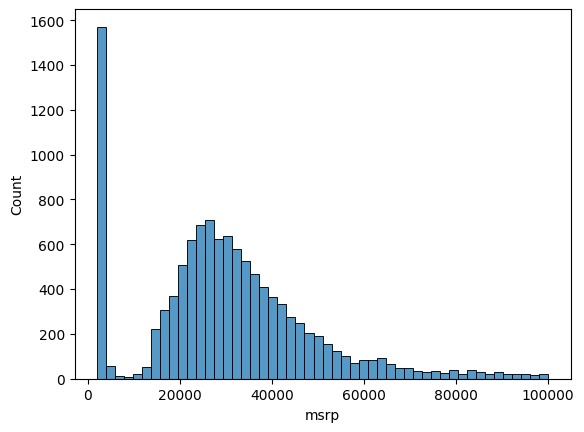

In [17]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [18]:
prices_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

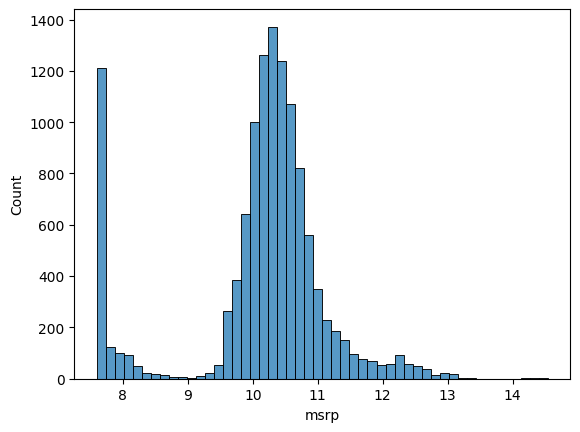

In [19]:
sns.histplot(prices_logs, bins=50)

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Validation framework

In [21]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val + n_test:]

In [24]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [25]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
ytest = np.log1p(df_test.msrp.values)


del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear Regression

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
xi = [453, 11, 86]
def g(xi):
    # do something
    1000

In [30]:

w0 = 7.17
w = [0.01, 0.04, 0.002]

In [31]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [32]:
linear_regression(xi)

12.312

In [33]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [34]:
np.log1p(222347.2221101062)

np.float64(12.312)

In [35]:
g(xi)

### 2.6 Linear regression vector form

In [36]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res += xi[j] * w[j]

    return res

In [37]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred += pred + w[j] * xi[j]

    return w0 + dot(xi, w)

In [38]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 1385]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])
np.array(X)

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

### 2.7 Training a linear regression model

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [40]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [41]:
y  = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [42]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
X = np.column_stack([ones, X])

In [44]:
XTX = X.T.dot(X)

In [45]:
XTX_inv = np.linalg.inv(XTX)

In [46]:
XTX_inv.shape

(4, 4)

In [47]:
w_full = XTX_inv.dot(X.T).dot(y)

In [48]:
w0 = w_full[0]
w = w_full[1:]

In [49]:
w0, w

(np.float64(25844.75405576684),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

### 2.8 Car price baseline model

In [51]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [58]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [68]:
X_train = df_train[base].values
X_train.shape

(7150, 5)

In [69]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [70]:
X_train = df_train[base].fillna(0).values

In [71]:
w0, w = train_linear_regression(X_train, y_train)

In [72]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

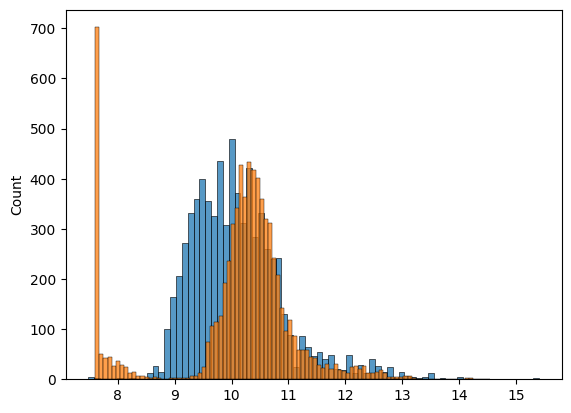

In [73]:
sns.histplot(y_pred)
sns.histplot(y_train)

### 2.9 Root Mean Squared Error

In [74]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### 2.10 Validating the model

In [76]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [77]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301601)

### 2.11 Feature Engineering

In [81]:
df_train.year.max()

np.int64(2017)

In [84]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [88]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058309)

<Axes: ylabel='Count'>

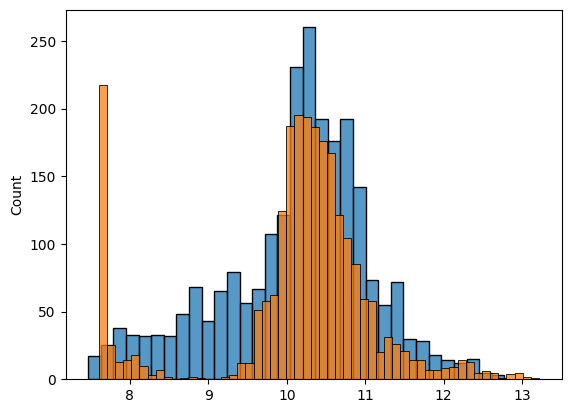

In [89]:
sns.histplot(y_pred)
sns.histplot(y_val)

### 2.12 Categorical variables

In [94]:
for v in [2,3,4]:
    df_train[f'num_doors_{v}'] = (df_train.number_of_doors == v).astype('int')

In [95]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [96]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5157995641502962)

In [101]:
car_makes = list(df.make.value_counts().head().index)

In [102]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for v in car_makes:
        df[f'make_{v}'] = (df.make == v).astype('int')
        features.append(f'make_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [103]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849555385)

In [105]:
categories = {}
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type',
    'driven_wheels', 'market_category', 'vehicle_size',
    'vehicle_style'
]
for c in categorical_variables:
    categories[c] =list(df[c].value_counts().head().index)

In [106]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for key, values in categories.items():
        for v in values:
            df[f'{key}_{v}'] = (df[key] == v).astype('int')
            features.append(f'{key}_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(231.6210136886514)

### 2.13 - Regularization

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001]
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [115]:
y = [1,2,3,1,2,3]

In [118]:
XTX = X.T.dot(X)

In [119]:
XTX_inv = np.linalg.inv(XTX)

In [120]:
XTX_inv.dot(X.T).dot(y)

array([ 3.36741230e-01, -5.04106394e+06,  5.04106425e+06])

In [123]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.00001],
    [2, 1.00001, 1]
]
XTX = np.array(XTX)

In [124]:
np.linalg.inv(XTX)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

In [127]:
XTX + 0.01 * np.eye(3)

array([[1.01   , 2.     , 2.     ],
       [2.     , 1.01   , 1.00001],
       [2.     , 1.00001, 1.01   ]])

In [135]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [136]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4565175086588339)

### 2.14 Tuning the model

In [138]:
for r in [0.0, 0.000000001, 0.00000000001, 0.00001, 0.01, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_res = rmse(y_val, y_pred)
    print(f"r={r} rmse={rmse_res} w0={w0}")

r=0.0 rmse=231.6210136886514 w0=-1.231078404543432e+17
r=1e-09 rmse=0.45645344347510536 w0=446017254.31686455
r=1e-11 rmse=0.8931428112115418 w0=1651098391312.5876
r=1e-05 rmse=0.45651701926559035 w0=5.496303518014922
r=0.01 rmse=0.4565219901265574 w0=6.276602119222456
r=1 rmse=0.4572204317990436 w0=5.634896668484315
r=10 rmse=0.4701456932101195 w0=4.283980108968702


In [139]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse_res = rmse(y_val, y_pred)
rmse_res

np.float64(0.4565175086588339)

### 2.15 Using the model

In [141]:
df_full_train = pd.concat([df_train, df_val])

In [144]:
df_full_train = df_full_train.reset_index(drop=True)

In [145]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.0,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,5.0,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,1.0,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,26.0,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN,NaN


In [146]:
X_full_train = prepare_X(df_full_train)

In [147]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [148]:
y_full_train = np.concatenate([y_train, y_val])

In [149]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [153]:
X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)
score_test = rmse(ytest, y_pred_test)
score_test

np.float64(0.45177493094267196)

In [155]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [156]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [157]:
X_small = prepare_X(df_small)

In [159]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [160]:
np.expm1(y_pred)

np.float64(34983.19630715528)

In [161]:
np.expm1(ytest[20])

np.float64(35000.00000000001)